In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mat = loadmat('ex5data1.mat') #Loading the given file
mat.keys() #getting the keys names

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [11]:
mat #getting an idea about the data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [42]:
df = pd.DataFrame(data = {'water_level': mat['X'].T[0], 'water_flowing': mat['y'].T[0]}) #this is to make a dataframe of the data for making the visualization easy
df # in this data there is traing,cross validation and test data set, so we will take the traning data set first(i.e X and y) 

,water_level,water_flowing
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965
5,-8.941458,2.121072
6,15.307793,14.710268
7,-34.706266,2.614184
8,1.389154,3.740172
9,-44.383760,3.731691


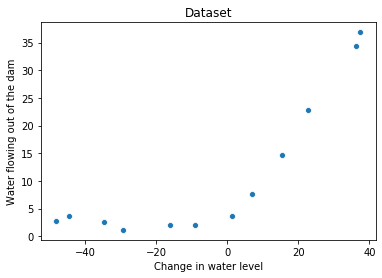

In [15]:
ax = sns.scatterplot(x='water_level', y='water_flowing', data=df) # this is to plot the training data set
ax.set(xlabel='Change in water level', ylabel='Water flowing out of the dam', title='Dataset');

In [47]:
#Regularized Linear Regression Cost Function
def linear_regression_cost(X, y, theta, lambda_r):
    m = X.shape[0]
    h = np.dot(X,theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y)) + (lambda_r/(2*m)) * np.sum(theta[1:,:]**2)
    return J

In [56]:
m = len(df)
X = np.hstack((np.ones((m,1)), df.water_level.values.reshape(-1,1))) #adding a column of 1s in front of the series
y = df.water_flowing.values.reshape(-1,1) #making the data into one column
theta = np.ones(shape=(X.shape[1],1))
J = linear_regression_cost(X, y, theta, 1)
print('Cost at theta = [1 ; 1]:', J, '\n(this value should be about 303.993192)')

Cost at theta = [1 ; 1]: [[303.99319222]] 
(this value should be about 303.993192)


In [82]:
#Regularized Linear Regression Gradient
def linear_regression_cost_function(theta, X, y, lambda_r):
    m = X.shape[0]
    theta = theta[:, np.newaxis] # This increases the dimension by 1, i.e this converts a 1-D array to 2-D array
    
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y)) + (lambda_r/(2*m)) * np.sum(theta[1:,:]**2)
    
    grad = (1/m) * (h-y).T.dot(X) + (lambda_r/m) * theta.T
    grad[0, 0] = (1/m) * (h-y).T.dot(X[:,0]) #as the regularization starts from theta1 not theta0
    return J, grad

In [83]:
theta = np.ones(shape=(X.shape[1]))
J, grad = linear_regression_cost_function(theta, X, y, 1);
print('Gradient at theta = [1 ; 1]:', grad, '\n(this value should be about [-15.303016; 598.250744]')

Gradient at theta = [1 ; 1]: [[-15.30301567 598.25074417]] 
(this value should be about [-15.303016; 598.250744]


In [84]:
#Fitting Linear Regression
import scipy.optimize as opt
def train_linear_regression(X, y, lambda_r):
    theta = np.ones(shape=(X.shape[1]))
    opt_results = opt.minimize(linear_regression_cost_function, theta, args=(X, y, lambda_r), 
                                method='L-BFGS-B', jac=True, options={'maxiter':200}) #advance optimization technique, here we need a 2-d array of theta
    return opt_results['x']

In [85]:
lambda_r = 0
theta_final = train_linear_regression(X, y, lambda_r)

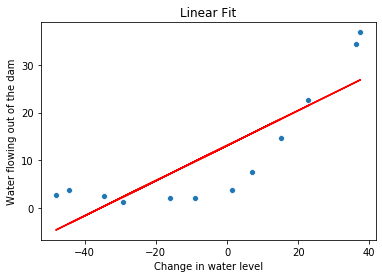

In [87]:
ax = sns.scatterplot(x='water_level', y='water_flowing', data=df)
plt.plot(X[:,1], np.dot(X,theta_final), color='r')
ax.set(xlabel='Change in water level', ylabel='Water flowing out of the dam', title='Linear Fit');

# Bias vs Variance

In [89]:
#Learning Curves
df_val = pd.DataFrame(data = {'water_level': mat['Xval'].T[0], 'water_flowing': mat['yval'].T[0]}) #getting the cross validation set
df_val.T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
water_level,-16.746536,-14.577471,34.515759,-47.010076,36.975119,-40.68611,-4.472011,26.533635,-42.797683,25.374099,...,27.311769,-3.263862,-1.818276,-40.719662,-50.013244,-17.411772,3.588194,7.085480,46.282369,14.612289
water_flowing,4.170202,4.067263,31.873068,10.623656,31.836021,4.95937,4.451599,22.276318,-0.000044,20.503802,...,19.365053,4.883763,11.097159,7.461708,1.476935,2.719164,10.926901,8.348712,52.781928,13.357340


In [93]:
Xval = df_val.water_level.values.reshape(-1,1)
Xval = np.hstack((np.ones((Xval.shape[0],1)), Xval))
yval = df_val.water_flowing.values.reshape(-1,1)

In [102]:
def learning_curve(X, y, Xval, yval, lambda_r):
    m = X.shape[0]
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1)) #Initialization of training and validation error series
    for i in range(1,m):
        theta = train_linear_regression(X[:i, :], y[:i], lambda_r)
        error_train[i], _ = linear_regression_cost_function(theta, X[:i,:], y[:i], 0) #calculation of cost with lambda=0
        error_val[i], _ = linear_regression_cost_function(theta, Xval, yval, 0)
    return error_train, error_val

In [103]:
lambda_r = 0
error_train, error_val = learning_curve(X, y, Xval, yval, lambda_r)

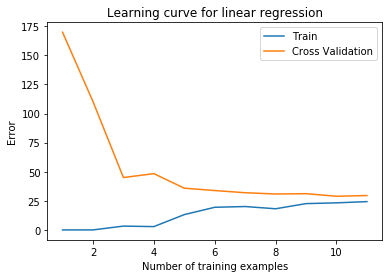

In [118]:
sns.lineplot(x=range(1,m), y=error_train.T[0][1:])
ax = sns.lineplot(x=range(1,m), y=error_val.T[0][1:])
ax.set(xlabel='Number of training examples', ylabel='Error', title='Learning curve for linear regression');
ax.legend(['Train', 'Cross Validation']);

In [97]:
df_error = pd.DataFrame(data={'error_train': error_train.T[0][1:], 'error_val': error_val.T[0][1:]})
df_error.T
#by the graph and the error values we can say it is a case of high Bias

,0,1,2,3,4,5,6,7,8,9,10
error_train,9.860761e-32,3.334883e-15,3.286595,2.842678,13.154049,19.443963,20.098522,18.172859,22.609405,23.261462,24.31725
error_val,1.698707e+02,1.103004e+02,45.010231,48.368911,35.865163,33.829961,31.970985,30.862444,31.135997,28.936204,29.55143


# Polynomial Regression

In [131]:
def poly_features(X, p):
    X_poly = np.zeros((X.shape[0], p))
    for i in range(p):
        X_poly[:,i] = X**(i+1)
    return X_poly

In [132]:
#Learning Polynomial Regression
#Normalizing features
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [133]:
p = 8 #given in question
X_poly = poly_features(mat['X'].T[0], p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0],1)), X_poly))

In [134]:
X_poly_test = poly_features(mat['Xtest'].T[0], p)
X_poly_test, _, _ = feature_normalize(X_poly_test, mu, sigma)
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0],1)), X_poly_test))

In [135]:
X_poly_val = poly_features(mat['Xval'].T[0], p)
X_poly_val, _, _ = feature_normalize(X_poly_val, mu, sigma)
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0],1)), X_poly_val))

In [136]:
#training and plotting 
def train_and_plot_fit_learning_curve(X, X_poly, y, X_poly_val, yval, lambda_r):
    theta = train_linear_regression(X_poly, y, lambda_r)

    plt.figure(figsize=(15,5))
    plt.subplot(121)
    ax = sns.scatterplot(x=X[:,1], y=y.T[0])
    x = np.arange(np.min(X)-15.0, np.max(X)+25.0, 0.05) #to get proper range of values
    plot_X_poly = poly_features(x, p)
    plot_X_poly, _, _ = feature_normalize(plot_X_poly, mu, sigma)
    plot_X_poly = np.hstack((np.ones((plot_X_poly.shape[0],1)), plot_X_poly))
    plt.plot(x, plot_X_poly.dot(theta), 'k--', color='r') #plotting the fit to the data
    ax.set(xlabel='Change in water level', ylabel='Water flowing out of the dam', 
           title='Polynomial Regression Fit ($\lambda$ = {})'.format(lambda_r));
    
    error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_r)
    plt.subplot(122)
    sns.lineplot(x=range(1,m), y=error_train.T[0][1:])
    ax = sns.lineplot(x=range(1,m), y=error_val.T[0][1:])
    ax.set(xlabel='Number of training examples', ylabel='Error', 
           title='Polynomial Regression Learning Curve ($\lambda$ = {})'.format(lambda_r));
    ax.legend(['Train', 'Cross Validation']); #plotting the Train error Vs cross validation error
    
    plt.subplots_adjust(wspace=0.2)
    plt.show()

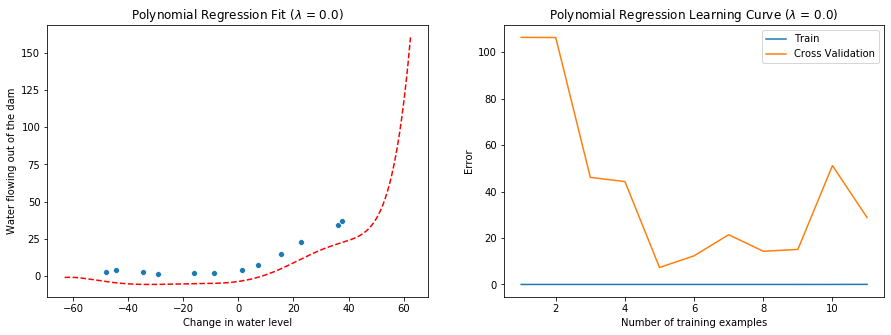

In [137]:
lambda_r = 0.0
train_and_plot_fit_learning_curve(X, X_poly, y, X_poly_val, yval, lambda_r)

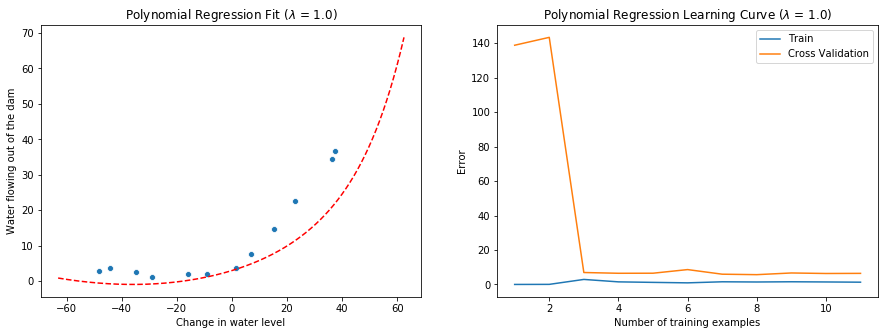

In [138]:
#Adjusting the regularzitation parameter
lambda_r = 1.0
train_and_plot_fit_learning_curve(X, X_poly, y, X_poly_val, yval, lambda_r)

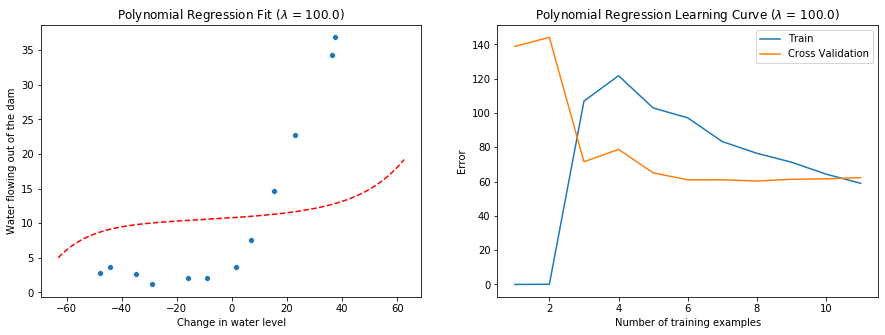

In [139]:
lambda_r = 100.0
train_and_plot_fit_learning_curve(X, X_poly, y, X_poly_val, yval, lambda_r)

In [140]:
#selecting lambda using validation set
def validation_curve(X, y, Xval, yval):
    lambda_values = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    error_train = np.zeros((len(lambda_values),1))
    error_val = np.zeros((len(lambda_values),1))
    for i,l in enumerate(lambda_values):
        theta = train_linear_regression(X, y, l)
        error_train[i], _ = linear_regression_cost_function(theta, X, y, 0)
        error_val[i], _ = linear_regression_cost_function(theta, Xval, yval, 0)
    return lambda_values, error_train, error_val

In [141]:
lambda_values, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)

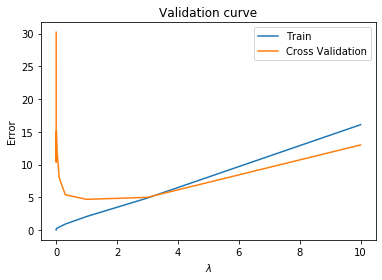

In [142]:
sns.lineplot(x=np.array(lambda_values), y=error_train.T[0])
ax = sns.lineplot(x=lambda_values, y=error_val.T[0])
ax.set(xlabel='$\lambda$', ylabel='Error', title='Validation curve');
ax.legend(['Train', 'Cross Validation']);

In [145]:
theta = train_linear_regression(X_poly, y, 3.0)
J, grad = linear_regression_cost_function(theta, X_poly_test, mat['ytest'], 0)
J

array([[11.64373681]])